In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [2]:
import re
import numpy as np
from numpy import sin, cos, tan, sqrt, e, pi, log, \
   cosh, sinh, tanh, arccos, arcsin, arctan, abs

from matplotlib import pyplot as plt
from sympy import symbols, solve
from matplotlib.pyplot import figure

VALID_WORDS = ['', 'sin', 'cos', 'tan', 'x', 'y', 'abs', 'sqrt', 'e',
    'pi', 'log', 'ln', 'acos', 'asin', 'atan', 'cosh', 'sinh', 'tanh',
    'arcsin', 'arctan', 'arccos']
ln, asin, acos, atan = log, arcsin, arccos, arctan

hide_toggle()

## Set constants

In [10]:
xmin = 40
xmax = 60
xticks = 15

ymin = 40
ymax = 60
yticks = 10

In [11]:
if xmax <= xmin: xmax = xmin + 1
if ymax <= ymin: ymax = ymin + 1
    
hide_toggle()

## Function to derivate
Operators accepted:
x, y, +, -, *, / ,^, e, pi, cos, sin, tan, abs, ln, acos, asin, atan, cosh, sinh, tanh

In [12]:
y_linha = "9.8-(y/5)"

In [13]:
words = re.split(r'[0-9.+\-*/^ ()]+', y_linha)
for word in words:
    if word not in VALID_WORDS:
        raise BaseException('Unrecognized expression in function: %s' % word)
s = y_linha.replace('^', '**')
s = re.sub(r'[0-9.]+', r'float(\g<0>)', s) # replace 1.232 with float(1.234)
try:
    fn = eval("lambda x,y: " + s)
except:
    raise BaseException('Something is wrong with the function you entered.')
    
hide_toggle()

## Doing the programming ;)

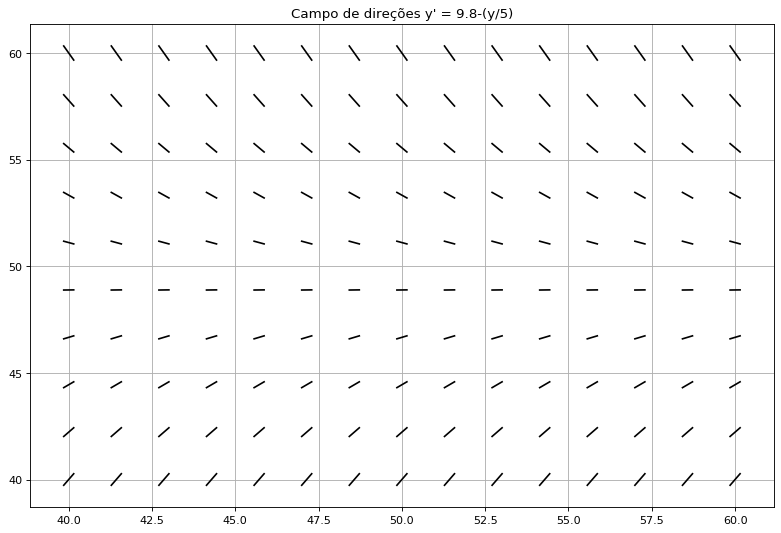

In [14]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

def derivada(x,y):
    return eval(y_linha)

x = np.linspace(xmin,xmax,xticks) # array com xticks elementos separados igualmente entre xmin e xmax
y = np.linspace(ymin,ymax,yticks) # array com yticks elementos separados igualmente entre ymin e ymax


# Para cada conjunto de x e y:
for i in x:
    for j in y:
        slope = derivada(i,j)                   # inclinação, dada pela derivada da função substituindo x e y;
        x_diff = np.linspace(i-0.15,i+0.15, 2)  # vetor da posição inicial e final de x;
        y_diff = slope*(x_diff-i)+j             # vetor da posição inicial e final de y;
        plt.plot(x_diff,y_diff, color='k')      # a partir dos vetores de x e y, plotamos o gráfico.

plt.title("Campo de direções y' = " + y_linha)
plt.grid(True)
plt.show()